In [1]:
# pd & np libraries to make life easier
import pandas as pd
import numpy as np

# visualizers I'll be using
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from graphviz import Graph

# to perform stats tests
from scipy import stats

# all sklearn lib's functs I intend on using
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

# to view Zach's threshold graph
import logistic_regression_util

#import all functions created in acquire , prepare & explore
import prepare
import acquire
import explore

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read TELCO data from sql
df = acquire.get_telco_data()

df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
1,4,1,1,0013-MHZWF,Female,0,No,Yes,9,Yes,...,Yes,Yes,Yes,Yes,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic)
2,1,1,1,0015-UOCOJ,Female,1,No,No,7,Yes,...,No,No,No,Yes,48.2,340.35,No,Month-to-month,DSL,Electronic check
3,1,1,1,0023-HGHWL,Male,1,No,No,1,No,...,No,No,No,Yes,25.1,25.1,Yes,Month-to-month,DSL,Electronic check
4,3,1,1,0032-PGELS,Female,0,Yes,Yes,1,No,...,No,No,No,No,30.5,30.5,Yes,Month-to-month,DSL,Bank transfer (automatic)


In [ ]:
# initial data summarization

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [4]:
df.describe()

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,2.315633,1.872923,1.690473,0.162147,32.371149,64.761692
std,1.148907,0.737796,0.833755,0.368612,24.559481,30.090047
min,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.500000
50%,2.000000,2.000000,1.000000,0.000000,29.000000,70.350000
75%,3.000000,2.000000,2.000000,0.000000,55.000000,89.850000
max,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000


In [5]:
df.shape

(7043, 24)

In [6]:
dfvc = df.isna().value_counts()
dfvc.to_frame().T

payment_type_id,False
internet_service_type_id,False
contract_type_id,False
customer_id,False
gender,False
senior_citizen,False
partner,False
dependents,False
tenure,False
phone_service,False
multiple_lines,False


<AxesSubplot:xlabel='monthly_charges', ylabel='Density'>

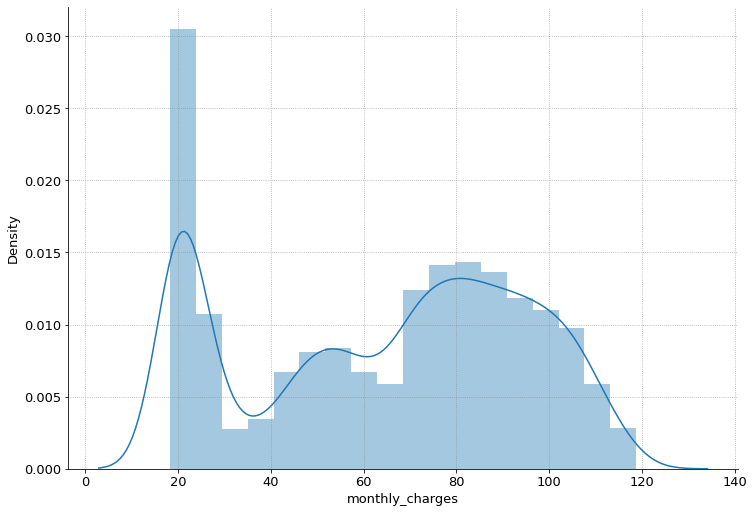

In [7]:
# Plot distributions of individual variables.
sns.distplot(df.monthly_charges)

<AxesSubplot:xlabel='senior_citizen', ylabel='Density'>

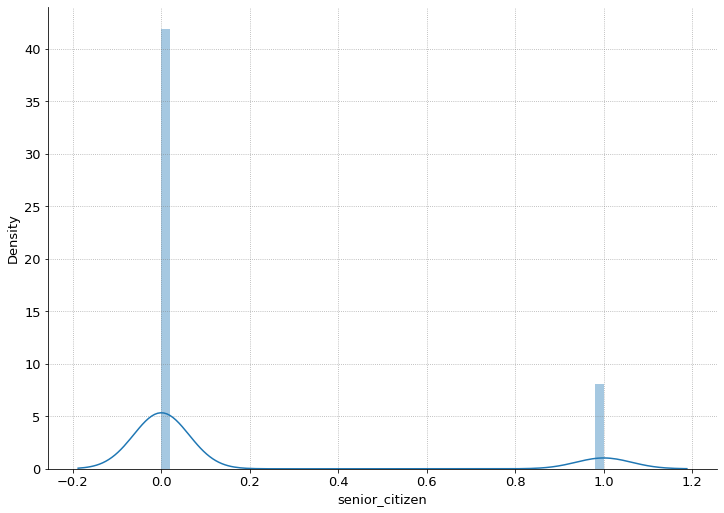

In [8]:
sns.distplot(df.senior_citizen)

<AxesSubplot:xlabel='tenure', ylabel='Density'>

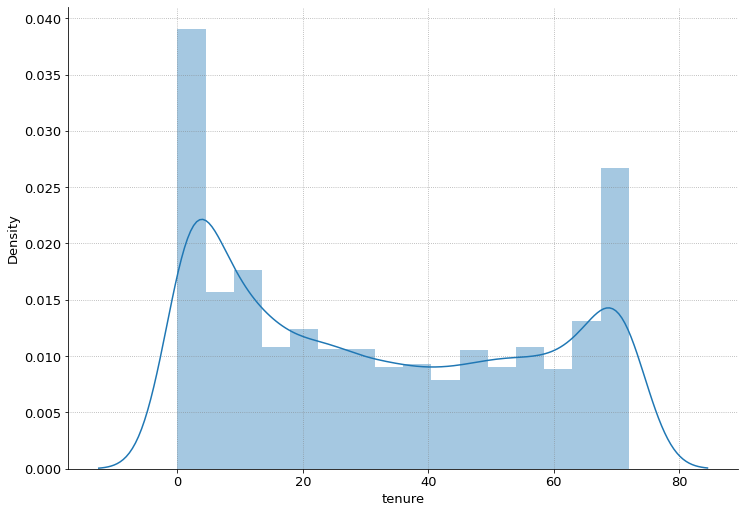

In [9]:
sns.distplot(df.tenure)

In [10]:
#df['total_charges'] = df['total_charges'].astype(str).astype(float)
df[["total_charges"]] = df[["total_charges"]].apply(pd.to_numeric)

ValueError: Unable to parse string " " at position 1878

ValueError: could not convert string to float: ''

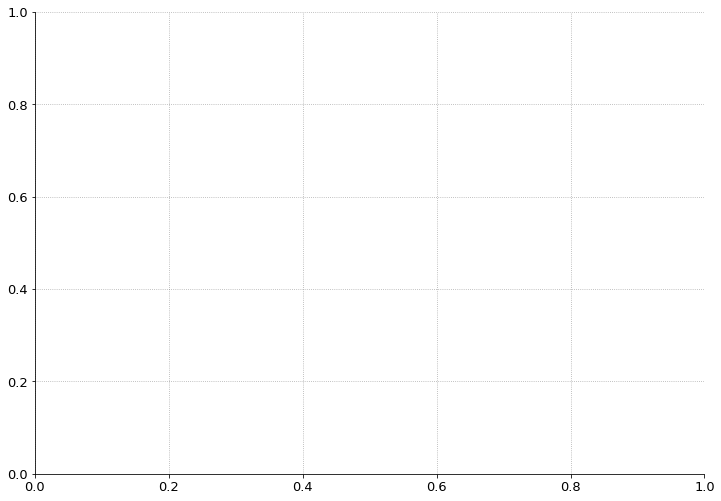

In [11]:
sns.distplot(df.total_charges)

In [12]:
df.total_charges.str.startswith(' ').value_counts()

False    7032
True       11
Name: total_charges, dtype: int64

In [4]:
# convert total_charges from obj to float
df.total_charges = pd.to_numeric(df.total_charges, errors='coerce').astype('float64')
# convert 11 blank total_charges of newly est. custs to ZERO.
df.total_charges = df.total_charges.fillna(value=0)

In [14]:
df.total_charges.isna().value_counts()

False    7043
Name: total_charges, dtype: int64

In [15]:
df.churn.value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

<AxesSubplot:xlabel='total_charges', ylabel='Density'>

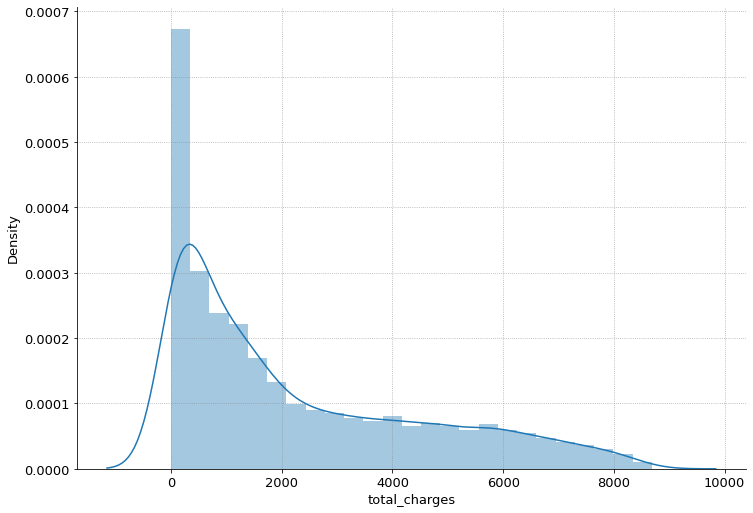

In [16]:
sns.distplot(df.total_charges)

In [ ]:
# baseline == 'No_churn'

In [ ]:
# clean data

I want to:
- drop:
    - payment_type_id
    - internet_service_type_id
    - contract_type_id
    
- encode:
    - partner
    - dependents
    - phone_service
    - paperless_billing
    - churn: 0=churn, 1=no_churn
    
- make dummies:
    - gender
    - multiple_lines
    - online_security
    - online_backup
    - device_protection
    - tech_support
    - streaming_tv
    - streaming_movies
    - contract_type
    - internet_service_type
    - payment_type
    
- rename col:
    - tenure:tenure_months
    
- replace:
    - Mailed check:mchk
    - Electronic check:echk
    - Credit card (automatic): acc
    - Bank transfer (automatic): abt

In [5]:
dropcols = ['payment_type_id', 'internet_service_type_id', 'contract_type_id']

In [6]:
df.drop(columns= dropcols, inplace=True)

In [7]:
df.head(2)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,No,Yes,No,59.9,542.40,No,Month-to-month,DSL,Mailed check
1,0013-MHZWF,Female,0,No,Yes,9,Yes,No,No,No,...,Yes,Yes,Yes,Yes,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic)


In [8]:
#df['gender'] = df['gender'].replace(['Female', 'Male'], [0, 1])

df.gender = df.gender.replace({'Female': 0, 'Male': 1})

In [9]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0003-MKNFE,1,0,No,No,9,Yes,Yes,No,No,...,No,No,Yes,No,59.9,542.40,No,Month-to-month,DSL,Mailed check
1,0013-MHZWF,0,0,No,Yes,9,Yes,No,No,No,...,Yes,Yes,Yes,Yes,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic)
2,0015-UOCOJ,0,1,No,No,7,Yes,No,Yes,No,...,No,No,No,Yes,48.2,340.35,No,Month-to-month,DSL,Electronic check
3,0023-HGHWL,1,1,No,No,1,No,No phone service,No,No,...,No,No,No,Yes,25.1,25.10,Yes,Month-to-month,DSL,Electronic check
4,0032-PGELS,0,0,Yes,Yes,1,No,No phone service,Yes,No,...,No,No,No,No,30.5,30.50,Yes,Month-to-month,DSL,Bank transfer (automatic)


In [10]:
df.partner = df.partner.replace({'No': 0, 'Yes': 1})

In [11]:
df.head(2)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0003-MKNFE,1,0,0,No,9,Yes,Yes,No,No,...,No,No,Yes,No,59.9,542.40,No,Month-to-month,DSL,Mailed check
1,0013-MHZWF,0,0,0,Yes,9,Yes,No,No,No,...,Yes,Yes,Yes,Yes,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic)


In [12]:
df.dependents = df.dependents.replace({'No': 0, 'Yes': 1})

In [13]:
df.head(2)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0003-MKNFE,1,0,0,0,9,Yes,Yes,No,No,...,No,No,Yes,No,59.9,542.40,No,Month-to-month,DSL,Mailed check
1,0013-MHZWF,0,0,0,1,9,Yes,No,No,No,...,Yes,Yes,Yes,Yes,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic)


In [15]:
df.phone_service.value_counts()

Yes    6361
No      682
Name: phone_service, dtype: int64

In [16]:
df.phone_service = df.phone_service.replace({'No': 0, 'Yes': 1})

In [17]:
df.head(2)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0003-MKNFE,1,0,0,0,9,1,Yes,No,No,...,No,No,Yes,No,59.9,542.40,No,Month-to-month,DSL,Mailed check
1,0013-MHZWF,0,0,0,1,9,1,No,No,No,...,Yes,Yes,Yes,Yes,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic)


In [18]:
df.multiple_lines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: multiple_lines, dtype: int64

In [19]:
df.multiple_lines = df.multiple_lines.replace({'No': 0, 'Yes': 1, 'No phone service': 3})

In [20]:
df.online_security = df.online_security.replace({'No': 0, 'Yes': 1, 'No internet service': 3})

In [21]:
df.online_backup = df.online_backup.replace({'No': 0, 'Yes': 1, 'No internet service': 3})

In [22]:
df.device_protection = df.device_protection.replace({'No': 0, 'Yes': 1, 'No internet service': 3})

In [23]:
df.tech_support = df.tech_support.replace({'No': 0, 'Yes': 1, 'No internet service': 3})

In [24]:
df.streaming_tv = df.streaming_tv.replace({'No': 0, 'Yes': 1, 'No internet service': 3})

In [25]:
df.streaming_movies = df.streaming_movies.replace({'No': 0, 'Yes': 1, 'No internet service': 3})

In [26]:
df.paperless_billing = df.paperless_billing.replace({'No': 0, 'Yes': 1})

In [27]:
df.churn = df.churn.replace({'No': 0, 'Yes': 1})

In [28]:
df.contract_type = df.contract_type.replace({'Month-to-month': 0, 'One year': 1, 'Two year': 2})

In [29]:
df.internet_service_type = df.internet_service_type.replace({'None': 0, 'DSL': 1, 'Fiber optic': 2})

In [30]:
df.head(2)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0003-MKNFE,1,0,0,0,9,1,1,0,0,...,0,0,1,0,59.9,542.40,0,0,1,Mailed check
1,0013-MHZWF,0,0,0,1,9,1,0,0,0,...,1,1,1,1,69.4,571.45,0,0,1,Credit card (automatic)


In [31]:
df.payment_type = df.payment_type.replace({'Mailed check': 'mchk', 'Electronic check': 'echk', 'Bank transfer (automatic)': 'abt', 'Credit card (automatic)': 'acc'})

In [32]:
df.head(2)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0003-MKNFE,1,0,0,0,9,1,1,0,0,...,0,0,1,0,59.9,542.40,0,0,1,mchk
1,0013-MHZWF,0,0,0,1,9,1,0,0,0,...,1,1,1,1,69.4,571.45,0,0,1,acc


In [33]:
pymttype_dummies = pd.get_dummies(df.payment_type, prefix='pymt_type', drop_first=True)

In [34]:
df = pd.concat([df, pymttype_dummies], axis =1)

In [36]:
df.head(2)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,pymt_type_acc,pymt_type_echk,pymt_type_mchk
0,0003-MKNFE,1,0,0,0,9,1,1,0,0,...,0,59.9,542.40,0,0,1,mchk,0,0,1
1,0013-MHZWF,0,0,0,1,9,1,0,0,0,...,1,69.4,571.45,0,0,1,acc,1,0,0


In [37]:
df.drop(columns= 'payment_type', inplace=True)

In [38]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,pymt_type_acc,pymt_type_echk,pymt_type_mchk
0,0003-MKNFE,1,0,0,0,9,1,1,0,0,...,1,0,59.9,542.40,0,0,1,0,0,1
1,0013-MHZWF,0,0,0,1,9,1,0,0,0,...,1,1,69.4,571.45,0,0,1,1,0,0
2,0015-UOCOJ,0,1,0,0,7,1,0,1,0,...,0,1,48.2,340.35,0,0,1,0,1,0
3,0023-HGHWL,1,1,0,0,1,0,3,0,0,...,0,1,25.1,25.10,1,0,1,0,1,0
4,0032-PGELS,0,0,1,1,1,0,3,1,0,...,0,0,30.5,30.50,1,0,1,0,0,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            7043 non-null   object 
 1   gender                 7043 non-null   int64  
 2   senior_citizen         7043 non-null   int64  
 3   partner                7043 non-null   int64  
 4   dependents             7043 non-null   int64  
 5   tenure                 7043 non-null   int64  
 6   phone_service          7043 non-null   int64  
 7   multiple_lines         7043 non-null   int64  
 8   online_security        7043 non-null   int64  
 9   online_backup          7043 non-null   int64  
 10  device_protection      7043 non-null   int64  
 11  tech_support           7043 non-null   int64  
 12  streaming_tv           7043 non-null   int64  
 13  streaming_movies       7043 non-null   int64  
 14  paperless_billing      7043 non-null   int64  
 15  mont

In [3]:
df = prepare.clean_telco(df)

In [4]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,pymt_type_abt,pymt_type_acc,pymt_type_echk,pymt_type_mchk,intserv_dsl,intserv_fiber,intserv_none,contract_1yr,contract_2yr,contract_m2m
0,0003-MKNFE,1,0,0,0,9,1,1,0,0,...,0,0,0,1,1,0,0,0,0,1
1,0013-MHZWF,0,0,0,1,9,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
2,0015-UOCOJ,0,1,0,0,7,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
3,0023-HGHWL,1,1,0,0,1,0,3,0,0,...,0,0,1,0,1,0,0,0,0,1
4,0032-PGELS,0,0,1,1,1,0,3,1,0,...,1,0,0,0,1,0,0,0,0,1


In [7]:
df['single_no_kids'] = df.apply(lambda row: row['partner'] + row['dependents'], axis=1)
df['single_no_kids'] = df.single_no_kids == 0
df['single_no_kids'] = (df['single_no_kids'] == True ).astype(int)

In [11]:
df.head(2)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,pymt_type_acc,pymt_type_echk,pymt_type_mchk,single_no_kids
0,0003-MKNFE,1,0,0,0,9,1,1,0,0,...,0,59.9,542.40,0,0,1,0,0,1,1
1,0013-MHZWF,0,0,0,1,9,1,0,0,0,...,1,69.4,571.45,0,0,1,1,0,0,0


In [13]:
df.phone_service.value_counts()

1    6361
0     682
Name: phone_service, dtype: int64

In [ ]:
df['phone_multi_line'] = df.apply(lambda row: row['phone_service'] + row['multiple_lines'], axis=1)
df['phone_multi_line'] = df.phone_multi_line == 2
df['phone_multi_line'] = (df['phone_multi_line'] == True ).astype(int)

In [6]:
# creates column to determine if row is a multi-line phone customer
# by summing 'phone_service' + 'multiple_lines'
df['phone_multi_line'] = (df['phone_service'] + df['multiple_lines']).apply(lambda x: 1 if x == 2 else 0)

In [7]:
# creates column to determine if row is a single-line phone customer
# by summing 'phone_service' + 'multiple_lines'
df['phone_sgl_line'] = (df['phone_service'] + df['multiple_lines']).apply(lambda x: 1 if x == 1 else 0)

In [8]:
# creates column to determine if row is a single w/dependents customer
# by summing 'partner' + 'dependents'
df['sgl_dependents'] = (df['partner'] + df['dependents']).apply(lambda x: 1 if x == 1 else 0)

In [9]:
# creates column to determine if row is a single w/o dependents customer
# by summing 'streaming_tv' + 'streaming_movies'
df['sgl_no_dep'] = (df['partner'] + df['dependents']).apply(lambda x: 1 if x == 0 else 0)

In [10]:
# creates column to determine if row is a not single w/ dependents customer
# by summing 'streaming_tv' + 'streaming_movies'
df['fam_house'] = (df['partner'] + df['dependents']).apply(lambda x: 1 if x == 2 else 0)

In [11]:
# creates column to determine if row is a customer streaming media
# by summing 'streaming_tv' + 'streaming_movies'
df['stream_media'] = (df['streaming_tv'] + df['streaming_movies']).apply(lambda x: 1 if x >= 1 else 0)

In [12]:
# creates column to determine if row is a customer taking advantage of online sercurity or backup
# by summing 'streaming_tv' + 'streaming_movies'
df['online_feats'] = (df['online_security'] + df['online_backup']).apply(lambda x: 1 if x >= 1 else 0)

In [13]:
# creates column to determine if row is a customer has autobill pay
# by summing 'streaming_tv' + 'streaming_movies' 
df['auto_billpay'] = (df['pymt_type_abt'] + df['pymt_type_acc']).apply(lambda x: 1 if x == 1 else 0)

In [15]:
# creates column that converts tenure unit to years 
df['tenure_yrs'] = round(df['tenure'] / 12, 2)

In [16]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,contract_m2m,tenure_yrs,phone_multi_line,phone_sgl_line,sgl_dependents,sgl_no_dep,fam_house,stream_media,online_feats,auto_billpay
0,0003-MKNFE,1,0,0,0,9,1,1,0,0,...,1,0.75,1,0,0,1,0,1,0,0
1,0013-MHZWF,0,0,0,1,9,1,0,0,0,...,1,0.75,0,1,1,0,0,1,0,1
2,0015-UOCOJ,0,1,0,0,7,1,0,1,0,...,1,0.58,0,1,0,1,0,0,1,0
3,0023-HGHWL,1,1,0,0,1,0,3,0,0,...,1,0.08,0,0,0,1,0,0,0,0
4,0032-PGELS,0,0,1,1,1,0,3,1,0,...,1,0.08,0,0,0,0,1,0,1,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            7043 non-null   object 
 1   gender                 7043 non-null   int64  
 2   senior_citizen         7043 non-null   int64  
 3   partner                7043 non-null   int64  
 4   dependents             7043 non-null   int64  
 5   tenure                 7043 non-null   int64  
 6   phone_service          7043 non-null   int64  
 7   multiple_lines         7043 non-null   int64  
 8   online_security        7043 non-null   int64  
 9   online_backup          7043 non-null   int64  
 10  device_protection      7043 non-null   int64  
 11  tech_support           7043 non-null   int64  
 12  streaming_tv           7043 non-null   int64  
 13  streaming_movies       7043 non-null   int64  
 14  paperless_billing      7043 non-null   int64  
 15  mont

In [3]:
# test prep_telco
train, validate, test = prepare. prep_telco(df)

In [4]:
train.shape, validate.shape, test.shape

((3943, 23), (1691, 23), (1409, 23))

In [5]:
train.head(2)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,pymt_type_acc,pymt_type_echk,pymt_type_mchk
477,3969-JQABI,0,0,1,0,58,1,0,1,1,...,0,1,65.25,3791.60,0,0,1,1,0,0
183,1600-DILPE,0,0,0,0,12,1,0,0,0,...,0,1,45.00,524.35,0,0,1,0,0,0


In [6]:
validate.head(2)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,pymt_type_acc,pymt_type_echk,pymt_type_mchk
3395,4547-LYTDD,0,0,0,0,16,1,1,0,0,...,0,0,72.65,1194.30,1,0,2,0,1,0
2992,2739-CACDQ,0,1,0,0,17,1,1,0,0,...,0,1,82.65,1470.05,0,0,2,1,0,0


In [7]:
test.head(2)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,pymt_type_acc,pymt_type_echk,pymt_type_mchk
3332,4238-HFHSN,1,1,1,0,61,1,1,0,1,...,0,1,82.15,4904.85,0,0,2,0,1,0
2669,1193-RTSLK,0,0,0,0,38,1,0,1,1,...,0,1,83.90,3233.60,1,0,2,1,0,0


In [3]:
# test prep_telco & train_validate_test
train, validate, test = prepare. train_validate_test(df)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 477 to 5742
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        3943 non-null   object 
 1   gender             3943 non-null   int64  
 2   senior_citizen     3943 non-null   int64  
 3   tenure             3943 non-null   int64  
 4   phone_service      3943 non-null   int64  
 5   multiple_lines     3943 non-null   int64  
 6   online_security    3943 non-null   int64  
 7   online_backup      3943 non-null   int64  
 8   device_protection  3943 non-null   int64  
 9   tech_support       3943 non-null   int64  
 10  paperless_billing  3943 non-null   int64  
 11  monthly_charges    3943 non-null   float64
 12  total_charges      3943 non-null   float64
 13  churn              3943 non-null   int64  
 14  pymt_type_abt      3943 non-null   uint8  
 15  pymt_type_acc      3943 non-null   uint8  
 16  pymt_type_echk     394

In [41]:
train.sgl_dependents.value_counts()

0    2790
1    1153
Name: sgl_dependents, dtype: int64

In [11]:
train.tenure.max()

72

# Exploring

In [5]:
# list all categorical & quantitative variables/features
cat_vars = ['churn', 'gender', 'senior_citizen', 'fam_house', 'sgl_dependents', 'sgl_no_dep', 'phone_service', 'phone_multi_line', 'phone_sgl_line', 'intserv_dsl', 'intserv_fiber', 'online_feats', 'stream_media', 'device_protection', 'tech_support', 'paperless_billing', 'auto_billpay', 'pymt_type_echk', 'pymt_type_mchk', 'contract_1yr', 'contract_2yr', 'contract_m2m']
quant_vars = ['tenure', 'tenure_yrs', 'monthly_charges', 'total_charges']

## Univariate

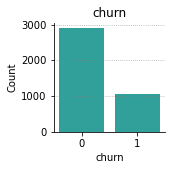

   churn  Count  Percent
0      0   2897    73.47
1      1   1046    26.53
_________________________________________________________________


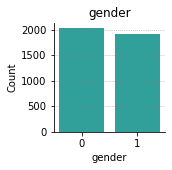

   gender  Count  Percent
1       0   2027    51.41
0       1   1916    48.59
_________________________________________________________________


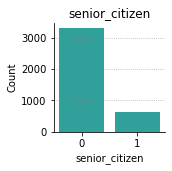

   senior_citizen  Count  Percent
0               0   3296    83.59
1               1    647    16.41
_________________________________________________________________


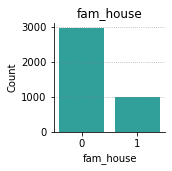

   fam_house  Count  Percent
0          0   2956    74.97
1          1    987    25.03
_________________________________________________________________


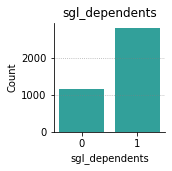

   sgl_dependents  Count  Percent
0               1   2790    70.76
1               0   1153    29.24
_________________________________________________________________


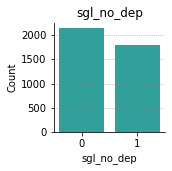

   sgl_no_dep  Count  Percent
0           0   2140    54.27
1           1   1803    45.73
_________________________________________________________________


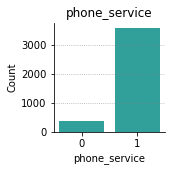

   phone_service  Count  Percent
1              1   3572    90.59
0              0    371     9.41
_________________________________________________________________


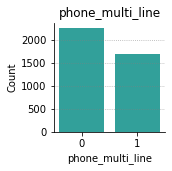

   phone_multi_line  Count  Percent
0                 0   2247    56.99
1                 1   1696    43.01
_________________________________________________________________


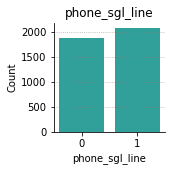

   phone_sgl_line  Count  Percent
0               1   2067    52.42
1               0   1876    47.58
_________________________________________________________________


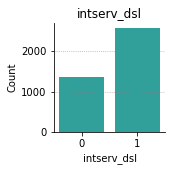

   intserv_dsl  Count  Percent
0            1   2574    65.28
1            0   1369    34.72
_________________________________________________________________


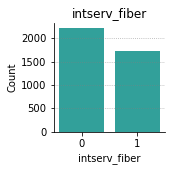

   intserv_fiber  Count  Percent
0              0   2209    56.02
1              1   1734    43.98
_________________________________________________________________


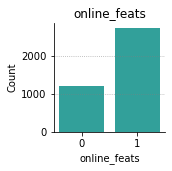

   online_feats  Count  Percent
1             1   2733    69.31
0             0   1210    30.69
_________________________________________________________________


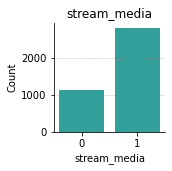

   stream_media  Count  Percent
1             1   2804    71.11
0             0   1139    28.89
_________________________________________________________________


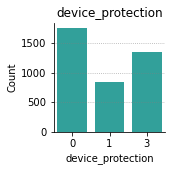

   device_protection  Count  Percent
0                  0   1752    44.43
1                  3   1351    34.26
3                  1    840    21.30
_________________________________________________________________


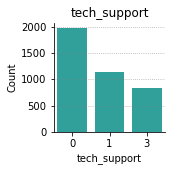

   tech_support  Count  Percent
0             0   1970    49.96
1             1   1133    28.73
3             3    840    21.30
_________________________________________________________________


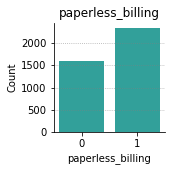

   paperless_billing  Count  Percent
1                  1   2335    59.22
0                  0   1608    40.78
_________________________________________________________________


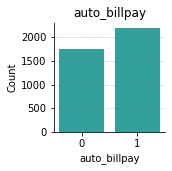

   auto_billpay  Count  Percent
0             1   2185    55.41
1             0   1758    44.59
_________________________________________________________________


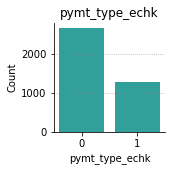

   pymt_type_echk  Count  Percent
0               0   2653    67.28
1               1   1290    32.72
_________________________________________________________________


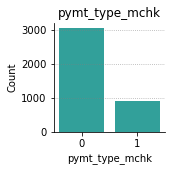

   pymt_type_mchk  Count  Percent
0               0   3048     77.3
1               1    895     22.7
_________________________________________________________________


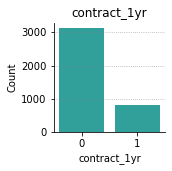

   contract_1yr  Count  Percent
0             0   3121    79.15
1             1    822    20.85
_________________________________________________________________


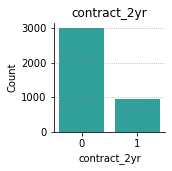

   contract_2yr  Count  Percent
0             0   2996    75.98
1             1    947    24.02
_________________________________________________________________


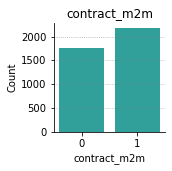

   contract_m2m  Count  Percent
1             1   2174    55.14
0             0   1769    44.86
_________________________________________________________________


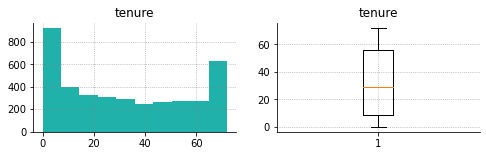

count    3943.000000
mean       32.346437
std        24.595947
min         0.000000
25%         9.000000
50%        29.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64


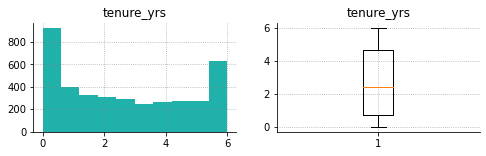

count    3943.000000
mean        2.695303
std         2.049994
min         0.000000
25%         0.750000
50%         2.420000
75%         4.670000
max         6.000000
Name: tenure_yrs, dtype: float64


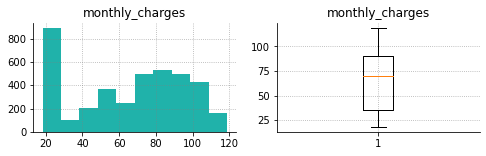

count    3943.000000
mean       64.984060
std        30.113274
min        18.250000
25%        35.750000
50%        70.450000
75%        89.975000
max       118.750000
Name: monthly_charges, dtype: float64


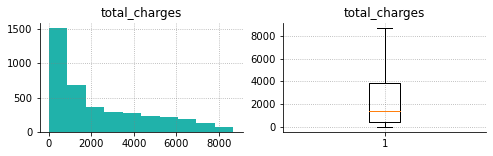

count    3943.000000
mean     2299.446386
std      2283.321722
min         0.000000
25%       383.650000
50%      1406.650000
75%      3818.925000
max      8684.800000
Name: total_charges, dtype: float64


In [47]:
explore.explore_univariate(train, cat_vars, quant_vars)

#### Takeaways:
- 

### Bivariate Stats

In [6]:
# We will want to remove the target variable from that list, as the function takes that variable as a separate argument.
cat_vars = cat_vars[1:]

gender 
_____________________

       chi2   p-value  degrees of freedom
0  0.656104  0.417939                   1

observed:
 churn      0     1   All
gender                  
0       1396   520  1916
1       1501   526  2027
All     2897  1046  3943

expected:
              0           1
0  1407.723054  508.276946
1  1489.276946  537.723054


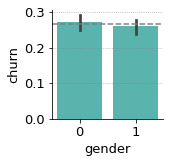


_____________________

senior_citizen 
_____________________

        chi2       p-value  degrees of freedom
0  73.236481  1.150102e-17                   1

observed:
 churn              0     1   All
senior_citizen                  
0               2510   786  3296
1                387   260   647
All             2897  1046  3943

expected:
              0           1
0  2421.636318  874.363682
1   475.363682  171.636318


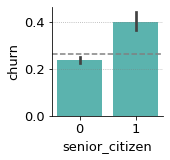


_____________________

fam_house 
_____________________

        chi2       p-value  degrees of freedom
0  89.059574  3.831003e-21                   1

observed:
 churn         0     1   All
fam_house                  
0          2058   898  2956
1           839   148   987
All        2897  1046  3943

expected:
            0         1
0  2171.8316  784.1684
1   725.1684  261.8316


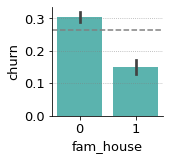


_____________________

sgl_dependents 
_____________________

       chi2  p-value  degrees of freedom
0  1.684862  0.19428                   1

observed:
 churn              0     1   All
sgl_dependents                  
0               2033   757  2790
1                864   289  1153
All             2897  1046  3943

expected:
              0           1
0  2049.868121  740.131879
1   847.131879  305.868121


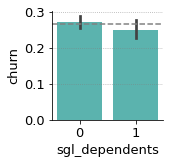


_____________________

sgl_no_dep 
_____________________

        chi2       p-value  degrees of freedom
0  88.881374  4.192120e-21                   1

observed:
 churn          0     1   All
sgl_no_dep                  
0           1703   437  2140
1           1194   609  1803
All         2897  1046  3943

expected:
              0           1
0  1572.300279  567.699721
1  1324.699721  478.300279


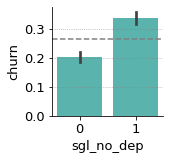


_____________________

phone_service 
_____________________

       chi2  p-value  degrees of freedom
0  0.130069  0.71836                   1

observed:
 churn             0     1   All
phone_service                  
0               276    95   371
1              2621   951  3572
All            2897  1046  3943

expected:
             0          1
0   272.58103   98.41897
1  2624.41897  947.58103


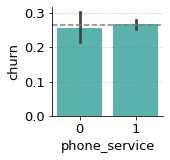


_____________________

phone_multi_line 
_____________________

       chi2  p-value  degrees of freedom
0  2.952788  0.08573                   1

observed:
 churn                0     1   All
phone_multi_line                  
0                 1675   572  2247
1                 1222   474  1696
All               2897  1046  3943

expected:
              0           1
0  1650.915293  596.084707
1  1246.084707  449.915293


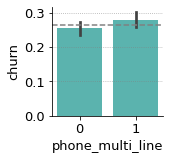


_____________________

phone_sgl_line 
_____________________

       chi2   p-value  degrees of freedom
0  2.121559  0.145239                   1

observed:
 churn              0     1   All
phone_sgl_line                  
0               1498   569  2067
1               1399   477  1876
All             2897  1046  3943

expected:
              0           1
0  1518.665737  548.334263
1  1378.334263  497.665737


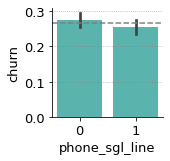


_____________________

intserv_dsl 
_____________________

        chi2       p-value  degrees of freedom
0  53.648736  2.397378e-13                   1

observed:
 churn           0     1   All
intserv_dsl                  
0            1794   780  2574
1            1103   266  1369
All          2897  1046  3943

expected:
              0           1
0  1891.168653  682.831347
1  1005.831347  363.168653


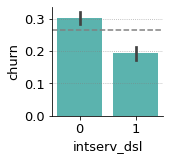


_____________________

intserv_fiber 
_____________________

         chi2       p-value  degrees of freedom
0  342.093455  2.233354e-76                   1

observed:
 churn             0     1   All
intserv_fiber                  
0              1878   331  2209
1              1019   715  1734
All            2897  1046  3943

expected:
              0           1
0  1622.995942  586.004058
1  1274.004058  459.995942


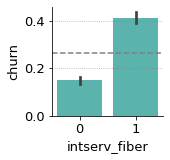


_____________________

online_feats 
_____________________

         chi2       p-value  degrees of freedom
0  447.656305  2.334379e-99                   1

observed:
 churn            0     1   All
online_feats                  
0              618   592  1210
1             2279   454  2733
All           2897  1046  3943

expected:
              0           1
0   889.010905  320.989095
1  2007.989095  725.010905


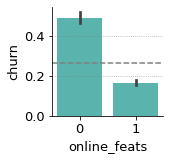


_____________________

stream_media 
_____________________

        chi2       p-value  degrees of freedom
0  48.326183  3.609010e-12                   1

observed:
 churn            0     1   All
stream_media                  
0              749   390  1139
1             2148   656  2804
All           2897  1046  3943

expected:
              0           1
0   836.845803  302.154197
1  2060.154197  743.845803


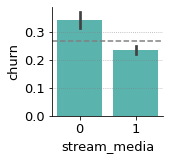


_____________________

device_protection 
_____________________

         chi2       p-value  degrees of freedom
0  327.288035  8.517385e-72                   2

observed:
 churn                 0     1   All
device_protection                  
0                  1057   695  1752
1                  1065   286  1351
3                   775    65   840
All                2897  1046  3943

expected:
              0           1
0  1287.229013  464.770987
1   992.606391  358.393609
2   617.164595  222.835405


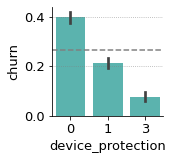


_____________________

tech_support 
_____________________

         chi2       p-value  degrees of freedom
0  454.088979  2.487889e-99                   2

observed:
 churn            0     1   All
tech_support                  
0             1156   814  1970
1              966   167  1133
3              775    65   840
All           2897  1046  3943

expected:
              0           1
0  1447.397920  522.602080
1   832.437484  300.562516
2   617.164595  222.835405


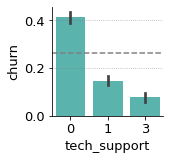


_____________________

paperless_billing 
_____________________

         chi2       p-value  degrees of freedom
0  134.626204  3.985644e-31                   1

observed:
 churn                 0     1   All
paperless_billing                  
0                  1340   268  1608
1                  1557   778  2335
All                2897  1046  3943

expected:
              0           1
0  1181.429369  426.570631
1  1715.570631  619.429369


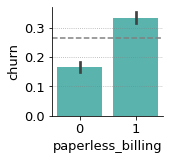


_____________________

auto_billpay 
_____________________

         chi2       p-value  degrees of freedom
0  204.106377  2.653218e-46                   1

observed:
 churn            0     1   All
auto_billpay                  
0             1408   777  2185
1             1489   269  1758
All           2897  1046  3943

expected:
              0           1
0  1605.362668  579.637332
1  1291.637332  466.362668


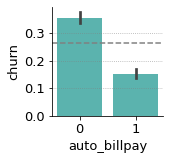


_____________________

pymt_type_echk 
_____________________

         chi2       p-value  degrees of freedom
0  367.347959  7.073449e-82                   1

observed:
 churn              0     1   All
pymt_type_echk                  
0               2199   454  2653
1                698   592  1290
All             2897  1046  3943

expected:
              0           1
0  1949.211514  703.788486
1   947.788486  342.211514


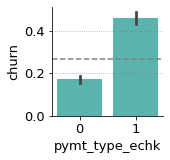


_____________________

pymt_type_mchk 
_____________________

        chi2   p-value  degrees of freedom
0  19.995342  0.000008                   1

observed:
 churn              0     1   All
pymt_type_mchk                  
0               2187   861  3048
1                710   185   895
All             2897  1046  3943

expected:
              0           1
0  2239.425818  808.574182
1   657.574182  237.425818


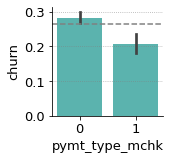


_____________________

contract_1yr 
_____________________

        chi2       p-value  degrees of freedom
0  112.72208  2.482424e-26                   1

observed:
 churn            0     1   All
contract_1yr                  
0             2173   948  3121
1              724    98   822
All           2897  1046  3943

expected:
             0          1
0  2293.06036  827.93964
1   603.93964  218.06036


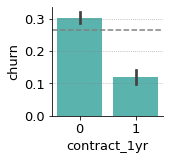


_____________________

contract_2yr 
_____________________

         chi2       p-value  degrees of freedom
0  369.753423  2.117783e-82                   1

observed:
 churn            0     1   All
contract_2yr                  
0             1973  1023  2996
1              924    23   947
All           2897  1046  3943

expected:
              0           1
0  2201.220391  794.779609
1   695.779609  251.220391


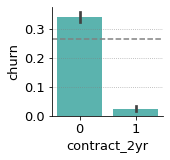


_____________________

contract_m2m 
_____________________

         chi2        p-value  degrees of freedom
0  636.244235  2.191634e-140                   1

observed:
 churn            0     1   All
contract_m2m                  
0             1648   121  1769
1             1249   925  2174
All           2897  1046  3943

expected:
              0           1
0  1299.719249  469.280751
1  1597.280751  576.719249


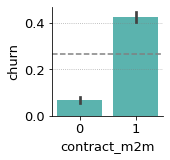


_____________________

tenure 
____________________



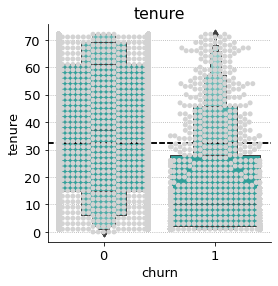

        count       mean        std  min   25%   50%   75%   max
churn                                                           
0      2897.0  37.615809  24.166816  0.0  15.0  37.0  61.0  72.0
1      1046.0  17.752390  19.322666  1.0   2.0  10.0  28.0  72.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=2250441.5, pvalue=3.422556934528117e-120)

____________________

tenure_yrs 
____________________



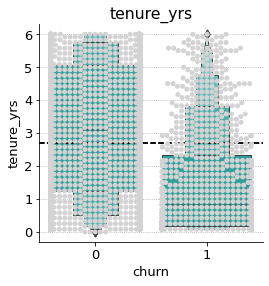

        count      mean       std   min   25%   50%   75%  max
churn                                                         
0      2897.0  3.134556  2.014114  0.00  1.25  3.08  5.08  6.0
1      1046.0  1.478748  1.610680  0.08  0.17  0.83  2.33  6.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=2250441.5, pvalue=3.422556934528117e-120)

____________________

monthly_charges 
____________________



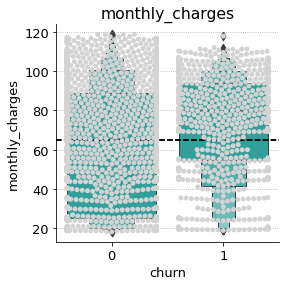

        count       mean        std    min      25%     50%      75%     max
churn                                                                       
0      2897.0  61.782482  31.173777  18.25  25.1000  65.150  89.1000  118.75
1      1046.0  73.851147  24.908639  19.00  55.0375  79.475  93.8875  117.80 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1182781.5, pvalue=6.204242082263631e-26)

____________________

total_charges 
____________________



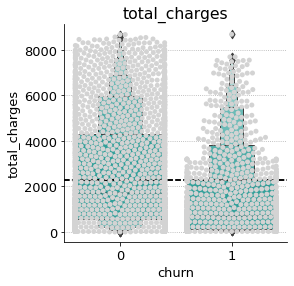

        count         mean          std   min       25%       50%        75%  \
churn                                                                          
0      2897.0  2588.708302  2353.432739   0.0  564.6500  1700.900  4307.1000   
1      1046.0  1498.307027  1855.595664  19.3  126.3125   679.575  2313.6625   

           max  
churn           
0      8672.45  
1      8684.80   


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1989429.5, pvalue=4.732930222315275e-51)

____________________



In [7]:
explore.explore_bivariate(train, 'churn', cat_vars, quant_vars)

#### Takeaways: 
- 

### Multivariate Stats

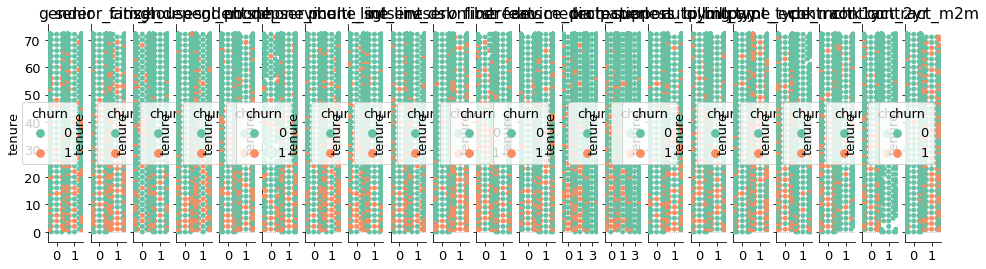

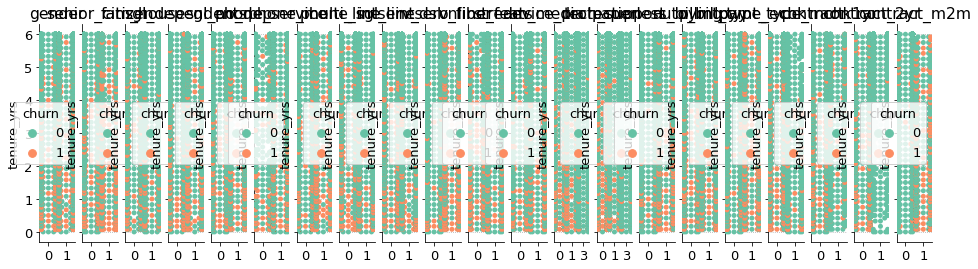

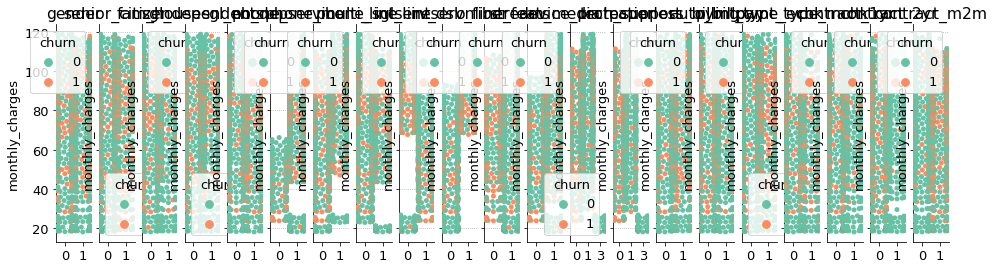

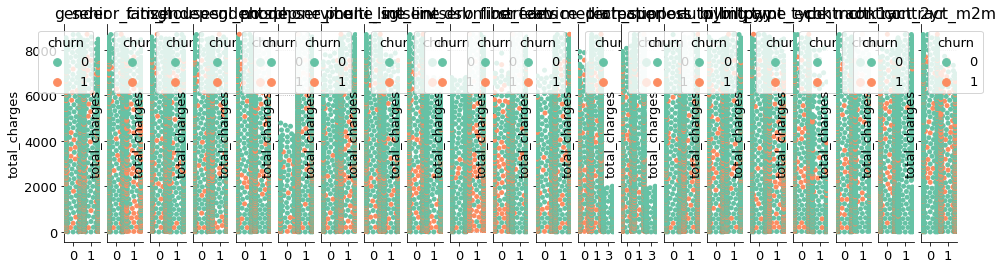

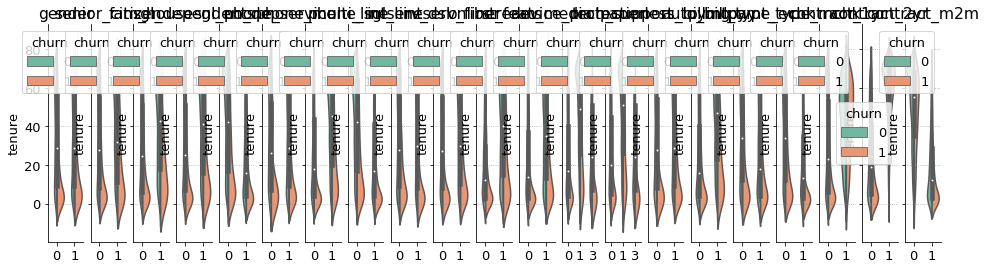

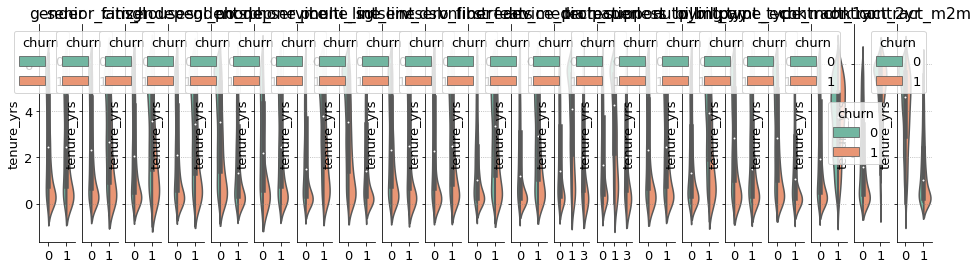

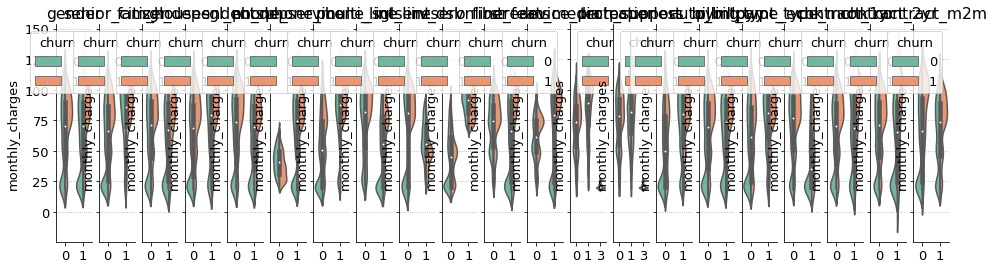

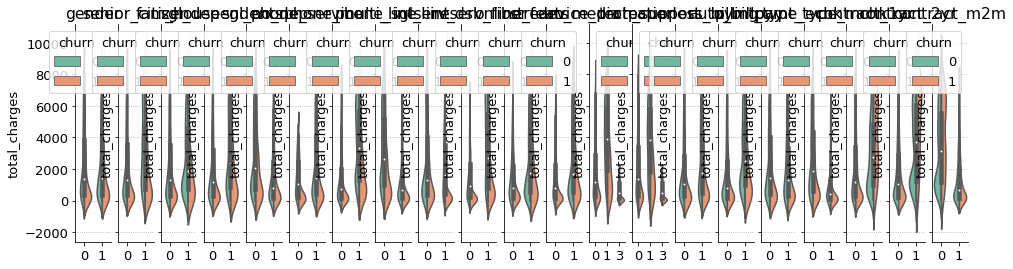

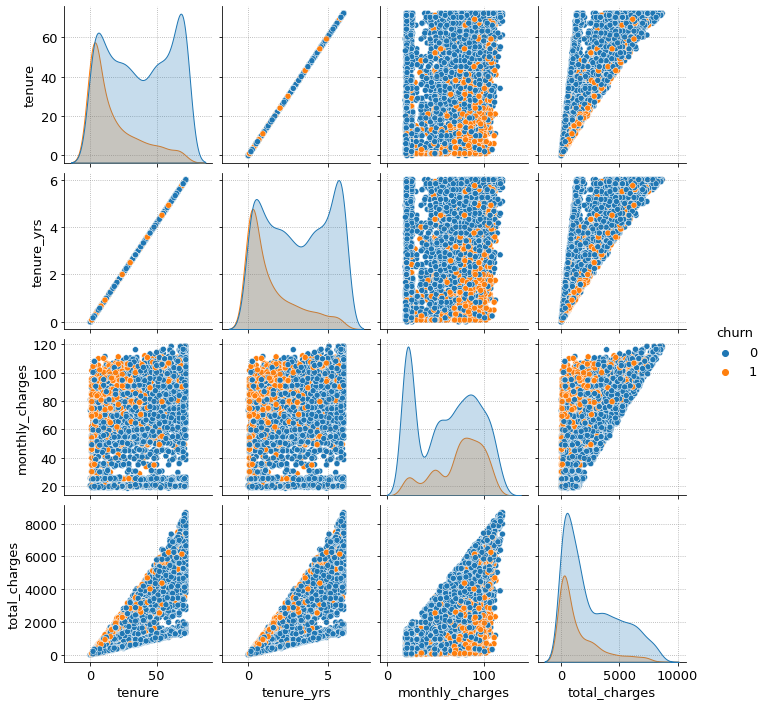

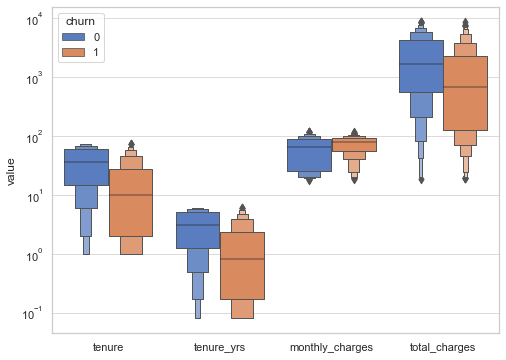

In [8]:
target = 'churn'

explore.explore_multivariate(train, target, cat_vars, quant_vars)

#### Takeaways: 
- 